#### Importing packages

In [69]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.ticker import StrMethodFormatter
from datetime import datetime
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot

In [2]:
pd.set_option('display.max_columns',None)
%matplotlib inline

#### Connecting to the Insights db provided 

In [37]:
cnx = sqlite3.connect('insights.db')

#### Mapping the various tables in the database to dataframes 

In [38]:
df_category = pd.read_sql_query("SELECT * FROM category", cnx)
df_keywords = pd.read_sql_query("SELECT * FROM keywords", cnx)
df_device = pd.read_sql_query("SELECT * FROM device", cnx)
df_browser = pd.read_sql_query("SELECT * FROM browser", cnx)
df_operating_system = pd.read_sql_query("SELECT * FROM operating_system", cnx)

In [39]:
df_operating_system

,"﻿""id""",name
0,0,Windows
1,15,Android
2,29,Chrome OS
3,30,WebOS
4,31,Palm
5,32,Meego
6,33,iOS
7,55,Mac OS X
8,56,Mac OS
9,57,Maemo


In [40]:
df_browser

,"﻿""id""",name
0,0,Outlook
1,4,IE
2,20,Edge
3,28,Chrome
4,74,Omniweb
5,75,Firefox
6,128,Safari
7,138,Coast
8,140,Opera
9,165,Konqueror


In [41]:
df_category

,﻿id,name
0,1,Arts & Entertainment
1,2,Celebrities & Entertainment News
2,3,Comics & Animation
3,4,Animated Films
4,5,Cartoons
5,6,Comics
6,7,Events & Listings
7,8,Clubs & Nightlife
8,9,Concerts & Music Festivals
9,10,Film Festivals


In [42]:
df_device

,"﻿""id""",name
0,0,Computer
1,1,Mobile
2,2,Tablet
3,3,Game Consoles
4,4,DMR
5,5,Wearables
6,6,Other


In [43]:
df_keywords

,"﻿""search_event_ts""",user_id,keywords,category_id,category_confidence,region,operating_system,browser,device_type
0,2019-01-19 18:18:30,8210000093611093475,national tyres and autocare vouchers,99,75,London,0,4,0
1,2019-01-19 03:38:34,118787399913335335,thrifty car rental uk vouchers,99,84,London,0,4,0
2,2019-01-19 03:39:21,118787399913335335,thrifty car rental uk vouchers,99,84,London,0,4,0
3,2019-01-19 09:22:45,2219573451295788507,national tyres and autocare vouchers,99,75,South East,0,4,0
4,2019-01-19 09:38:32,663242165750405044,national tyres and autocare vouchers,99,75,London,0,4,0
5,2019-01-19 06:05:58,3462303808341080501,national tyres and autocare vouchers,99,75,North East,0,4,0
6,2019-01-19 21:18:48,5568230841612798395,argus car hire vouchers,99,77,Midlands,0,4,0
7,2019-01-19 21:21:23,5568230841612798395,holiday autos vouchers,99,74,Midlands,0,4,0
8,2019-01-19 11:39:56,4051802900046557795,tyres on the drive vouchers,178,75,London,0,4,0
9,2019-01-19 18:49:57,3887182723249063781,tyres on the drive vouchers,178,75,Midlands,0,4,0


#### Checking for the occurances of BMW in the whole data

In [74]:
df_bmw = df_keywords[df_keywords['keywords'].str.contains("bmw", flags=re.IGNORECASE, regex=True)]

In [75]:
df_bmw

,"﻿""search_event_ts""",user_id,keywords,category_id,category_confidence,region,operating_system,browser,device_type,bmw_target_col
37,2019-01-19 10:39:28,5887449299356772500,bmw k1100lt,105,77,London,0,4,0,1
41,2019-01-19 19:59:26,4638174213759902642,bmw spares,105,70,London,0,4,0,1
42,2019-01-19 00:11:27,4638174213759902642,bmw e61,105,77,London,0,4,0,1
43,2019-01-19 00:12:40,4638174213759902642,bmw e61,105,77,London,0,4,0,1
44,2019-01-19 00:12:22,4638174213759902642,bmw e61,105,77,London,0,4,0,1
45,2019-01-19 00:12:33,4638174213759902642,bmw e61,105,77,London,0,4,0,1
76,2019-01-19 11:01:27,8662962081270913450,bmw motorcycle jacket,122,86,South East,0,4,0,1
246,2019-01-19 12:15:28,6280759157782617879,bmw,105,77,Yorkshire & the Humber,0,4,0,1
266,2019-01-19 16:13:45,3868085041707939376,BMW,104,72,South East,0,4,0,0
267,2019-01-19 13:28:09,3868085041707939376,BMW,104,72,South East,0,4,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001662CDD4198>]],
      dtype=object)

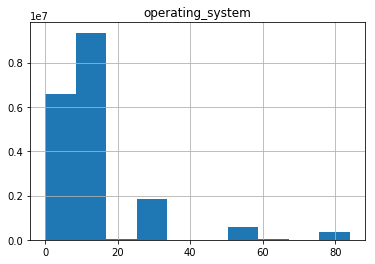

In [76]:
df_keywords.hist(column='operating_system')

In [77]:
df_keywords['keywords'].value_counts()

car                                                    2704506
bmw                                                     349627
motorcycle                                              320656
Cars                                                    308324
motorbike                                               268700
4x4                                                     250780
motorhome                                               235411
boat                                                    230873
vauxhall corsa                                          177092
corsa                                                   160337
road bike                                               144127
auto                                                    137837
automatic car                                           129458
toyota yaris                                            112317
bmw x5                                                   94344
tractor                                                

In [78]:
df_bmw['keywords'].value_counts().head(50)

bmw                         349627
bmw x5                       94344
Bmw                          50653
bmw 320d                     37111
bmw x3                       29036
bmw e36                      24567
bmw e30                      22556
bmw 530d                     21950
bmw 330d                     21664
bmw m3                       21151
bmw z4                       20998
bmw 520d                     20261
bmw e46                      19885
bmw alloys                   18840
bmw convertible              17459
bmw x6                       14771
bmw z3                       12587
bmw x1                       11125
Bmw x5                       11094
bmw 335d                     10998
bmw e39                      10910
bmw 535d                     10377
bmw wheels                   10009
bmw 1 series coupe            9900
bmw 335i                      9154
BMW                           9126
bmw 3 series convertible      9035
bmw coupe                     8735
bmw m5              

#### Exporting the tables as CSV to work with on Tableau

In [79]:
df_category.to_csv('category.csv')
df_keywords.to_csv('keywords.csv')
df_device.to_csv('device.csv')
df_browser.to_csv('browser.csv')
df_operating_system.to_csv('operating_system.csv')
df_bmw.to_csv('bmw.csv')

In [80]:
df_keywords[df_keywords['keywords'].str.contains("bloodhound")]

,"﻿""search_event_ts""",user_id,keywords,category_id,category_confidence,region,operating_system,browser,device_type,bmw_target_col
569464,2019-01-22 18:33:32,617232683874900775,bloodhound car facts,121,76,London,0,20,0,0
569465,2019-01-22 20:40:18,617232683874900775,bloodhound car facts,121,76,London,0,20,0,0
569466,2019-01-22 16:56:57,617232683874900775,bloodhound car facts,121,76,London,0,20,0,0
1141573,2019-01-06 13:48:21,2532147988878599162,who will drive the bloodhound car,178,82,London,0,20,0,0
4492158,2019-02-07 22:00:51,3285435797744476665,bloodhound supersonic car,121,76,North West,4,197,0,0
12538371,2019-03-10 11:45:26,7255719805295351373,bloodhound car facts,121,76,Midlands,0,4,0,0
14779785,2019-03-11 19:59:14,6534060068049831948,bloodhound supersonic car facts,121,75,Wales,0,20,0,0


In [81]:
df_keywords[df_keywords['keywords'].str.contains("bmw", flags=re.IGNORECASE, regex=True)]

,"﻿""search_event_ts""",user_id,keywords,category_id,category_confidence,region,operating_system,browser,device_type,bmw_target_col
37,2019-01-19 10:39:28,5887449299356772500,bmw k1100lt,105,77,London,0,4,0,1
41,2019-01-19 19:59:26,4638174213759902642,bmw spares,105,70,London,0,4,0,1
42,2019-01-19 00:11:27,4638174213759902642,bmw e61,105,77,London,0,4,0,1
43,2019-01-19 00:12:40,4638174213759902642,bmw e61,105,77,London,0,4,0,1
44,2019-01-19 00:12:22,4638174213759902642,bmw e61,105,77,London,0,4,0,1
45,2019-01-19 00:12:33,4638174213759902642,bmw e61,105,77,London,0,4,0,1
76,2019-01-19 11:01:27,8662962081270913450,bmw motorcycle jacket,122,86,South East,0,4,0,1
246,2019-01-19 12:15:28,6280759157782617879,bmw,105,77,Yorkshire & the Humber,0,4,0,1
266,2019-01-19 16:13:45,3868085041707939376,BMW,104,72,South East,0,4,0,0
267,2019-01-19 13:28:09,3868085041707939376,BMW,104,72,South East,0,4,0,0


In [82]:
df_mercedes = df_keywords[df_keywords['keywords'].str.contains("mercedes", flags=re.IGNORECASE, regex=True)]

In [83]:
df_bmw.shape

(1744674, 10)

In [84]:
df_mercedes.shape

(156703, 10)

In [85]:
df_audi = df_keywords[df_keywords['keywords'].str.contains("audi", flags=re.IGNORECASE, regex=True)]

In [86]:
df_audi.shape

(381478, 10)

In [87]:
df_mercedes.to_csv('df_mercedes.csv')
df_audi.to_csv('df_audi.csv')

#### Creating a new dataframe to answer Q3

In [88]:
df_mercedes_audi_bmw = df_keywords[(df_keywords['keywords'].str.contains("mercedes", flags=re.IGNORECASE, regex=True)) | 
                                   (df_keywords['keywords'].str.contains("audi", flags=re.IGNORECASE, regex=True)) |
                                   (df_keywords['keywords'].str.contains("bmw", flags=re.IGNORECASE, regex=True))]

In [89]:
df_mercedes_audi_bmw.shape

(2282485, 10)

In [90]:
df_mercedes_audi_bmw.to_csv('df_mercedes_audi_bmw.csv')

#### Creating one hot vectors

In [5]:
# After idenfifying the top categories of BMW, we will create one-hot vectors only for those categories.

def get_category_for_one_hot(data):
    if data['category_id'] == 105:
        return 'Hatchback'
    elif data['category_id'] == 104:
        return 'Coupe'
    elif data['category_id'] == 189:
        return 'Vehicle Wheels & Tires'
    elif data['category_id'] == 108:
        return 'Convertibles'
    elif data['category_id'] == 106:
        return 'Diesel'
    elif data['category_id'] == 121:
        return 'Microcars & City Cars'
    elif data['category_id'] == 186:
        return 'Engine & Transmission'
    elif data['category_id'] == 122:
        return 'Motorcycles'
    elif data['category_id'] == 107:
        return 'Petrol'
    elif data['category_id'] == 99:
        return 'Buy New Cars'
    elif data['category_id'] == 127:
        return 'SUVs'
    elif data['category_id'] == 192:
        return 'Vehicle Specs Reviews & Comparisons'
    else:
        return 'Others'

In [6]:
df_keywords['category_id_imp'] = df_keywords.apply(get_category_for_one_hot, axis = 1)

In [7]:
df_keywords.head(100)

,"﻿""search_event_ts""",user_id,keywords,category_id,category_confidence,region,operating_system,browser,device_type,category_id_imp
0,2019-01-19 18:18:30,8210000093611093475,national tyres and autocare vouchers,99,75,London,0,4,0,Buy New Cars
1,2019-01-19 03:38:34,118787399913335335,thrifty car rental uk vouchers,99,84,London,0,4,0,Buy New Cars
2,2019-01-19 03:39:21,118787399913335335,thrifty car rental uk vouchers,99,84,London,0,4,0,Buy New Cars
3,2019-01-19 09:22:45,2219573451295788507,national tyres and autocare vouchers,99,75,South East,0,4,0,Buy New Cars
4,2019-01-19 09:38:32,663242165750405044,national tyres and autocare vouchers,99,75,London,0,4,0,Buy New Cars
5,2019-01-19 06:05:58,3462303808341080501,national tyres and autocare vouchers,99,75,North East,0,4,0,Buy New Cars
6,2019-01-19 21:18:48,5568230841612798395,argus car hire vouchers,99,77,Midlands,0,4,0,Buy New Cars
7,2019-01-19 21:21:23,5568230841612798395,holiday autos vouchers,99,74,Midlands,0,4,0,Buy New Cars
8,2019-01-19 11:39:56,4051802900046557795,tyres on the drive vouchers,178,75,London,0,4,0,Others
9,2019-01-19 18:49:57,3887182723249063781,tyres on the drive vouchers,178,75,Midlands,0,4,0,Others


#### Creating dummies

In [8]:
dfDummies_category_id_imp = pd.get_dummies(df_keywords['category_id_imp'], prefix='category_id_', drop_first=True)
dfDummies_region = pd.get_dummies(df_keywords['region'], prefix='region_', drop_first=True)
dfDummies_operating_system = pd.get_dummies(df_keywords['operating_system'], prefix='operating_system_', drop_first=True)
dfDummies_browser = pd.get_dummies(df_keywords['browser'], prefix='browser_', drop_first=True)
dfDummies_device_type = pd.get_dummies(df_keywords['device_type'], prefix='device_type_', drop_first=True)

#### Concatenating the dummies created for the columns to the original dataframe

In [9]:
df_keywords = pd.concat([df_keywords, dfDummies_category_id_imp], axis=1)
df_keywords = pd.concat([df_keywords, dfDummies_region], axis=1)
df_keywords = pd.concat([df_keywords, dfDummies_operating_system], axis=1)
df_keywords = pd.concat([df_keywords, dfDummies_browser], axis=1)
df_keywords = pd.concat([df_keywords, dfDummies_device_type], axis=1)

#### Creating the target column for our model

In [10]:
df_keywords['bmw_target_col'] = pd.np.where(df_keywords.keywords.str.contains("bmw", na=False), 1, 0)

In [11]:
df_keywords.head()

,"﻿""search_event_ts""",user_id,keywords,category_id,category_confidence,region,operating_system,browser,device_type,category_id_imp,category_id__Convertibles,category_id__Coupe,category_id__Diesel,category_id__Engine & Transmission,category_id__Hatchback,category_id__Microcars & City Cars,category_id__Motorcycles,category_id__Others,category_id__Petrol,category_id__SUVs,category_id__Vehicle Specs Reviews & Comparisons,category_id__Vehicle Wheels & Tires,region__London,region__Midlands,region__North East,region__North West,region__Northern Ireland,region__Scotland,region__Scottish Border,region__South East,region__Wales,region__West,region__West Country,region__Yorkshire & the Humber,operating_system__1,operating_system__3,operating_system__4,operating_system__5,operating_system__6,operating_system__7,operating_system__10,operating_system__14,operating_system__15,operating_system__16,operating_system__18,operating_system__20,operating_system__24,operating_system__27,operating_system__29,operating_system__32,operating_system__33,operating_system__34,operating_system__39,operating_system__40,operating_system__41,operating_system__42,operating_system__55,operating_system__56,operating_system__57,operating_system__60,operating_system__63,operating_system__74,operating_system__75,operating_system__76,operating_system__79,operating_system__82,operating_system__84,browser__20,browser__28,browser__75,browser__128,browser__138,browser__140,browser__167,browser__184,browser__185,browser__186,browser__188,browser__197,device_type__1,device_type__2,device_type__3,device_type__6,bmw_target_col
0,2019-01-19 18:18:30,8210000093611093475,national tyres and autocare vouchers,99,75,London,0,4,0,Buy New Cars,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-01-19 03:38:34,118787399913335335,thrifty car rental uk vouchers,99,84,London,0,4,0,Buy New Cars,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-01-19 03:39:21,118787399913335335,thrifty car rental uk vouchers,99,84,London,0,4,0,Buy New Cars,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-01-19 09:22:45,2219573451295788507,national tyres and autocare vouchers,99,75,South East,0,4,0,Buy New Cars,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-01-19 09:38:32,663242165750405044,national tyres and autocare vouchers,99,75,London,0,4,0,Buy New Cars,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Dropping all unnecassary columns

In [12]:
df_keywords.drop(df_keywords.columns[0], axis=1, inplace=True)
df_keywords.drop(['user_id','keywords', 'category_id', 'category_confidence', 'region', 'category_id__Others', 'operating_system', 'browser', 'device_type', 
           'category_id_imp', 'device_type__2', 'browser__197'], axis=1, inplace=True)

In [25]:
df_keywords.head()

,category_id__Convertibles,category_id__Coupe,category_id__Diesel,category_id__Engine & Transmission,category_id__Hatchback,category_id__Microcars & City Cars,category_id__Motorcycles,category_id__Petrol,category_id__SUVs,category_id__Vehicle Specs Reviews & Comparisons,category_id__Vehicle Wheels & Tires,region__London,region__Midlands,region__North East,region__North West,region__Northern Ireland,region__Scotland,region__Scottish Border,region__South East,region__Wales,region__West,region__West Country,region__Yorkshire & the Humber,operating_system__1,operating_system__3,operating_system__4,operating_system__5,operating_system__6,operating_system__7,operating_system__10,operating_system__14,operating_system__15,operating_system__16,operating_system__18,operating_system__20,operating_system__24,operating_system__27,operating_system__29,operating_system__32,operating_system__33,operating_system__34,operating_system__39,operating_system__40,operating_system__41,operating_system__42,operating_system__55,operating_system__56,operating_system__57,operating_system__60,operating_system__63,operating_system__74,operating_system__75,operating_system__76,operating_system__79,operating_system__82,operating_system__84,browser__20,browser__28,browser__75,browser__128,browser__138,browser__140,browser__167,browser__184,browser__185,browser__186,browser__188,device_type__1,device_type__3,device_type__6,bmw_target_col
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
frac = 0.05
df_frac = df_keywords.sample(frac=frac,random_state=6)

In [27]:
df_frac.shape

(941211, 71)

#### Defining the XGBoost Classifier

In [28]:
def xgboost_classifier(X,y,title):
    model = XGBClassifier()
    model.fit(X, y)
    
    ax = plot_importance(model,max_num_features=15,title=title)
    fig = ax.figure
    fig.set_size_inches(5, 5)

#### Running the model

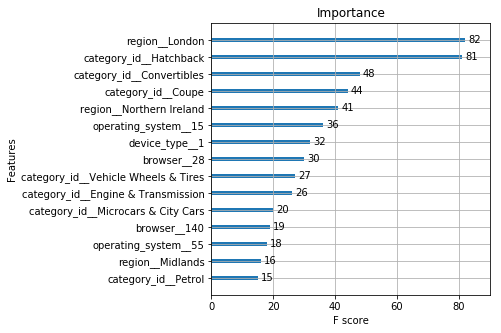

In [29]:
dependent_variable = 'bmw_target_col'
dependent_variables = [dependent_variable]

X = df_frac.loc[:,:].drop(dependent_variables,axis=1)
y = df_frac[dependent_variables]

xgboost_classifier(X,y,'Importance')